In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

11490434/11490434 [==============================] - 0s 0us/step
Original training set shape:    (60000, 28, 28)
Original training labels shape: (60000, 10)
Test set shape:                 (10000, 28, 28)
Test labels shape:              (10000, 10)


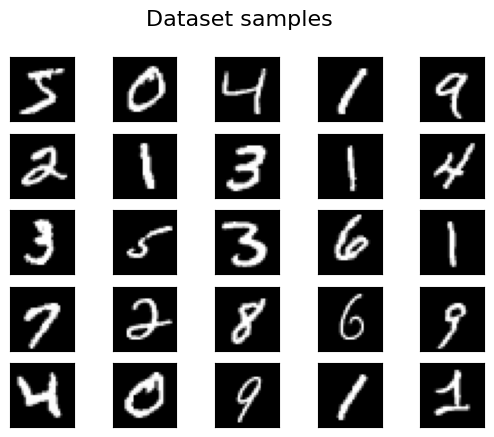

In [2]:
# Utilizar os datasets builtin do tensorflow - facilita a preparacao dos dados
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizacao dos valores de pixel para o intervalo [0 ... 1] - com imagens
# este passo normalmente conduz a resultados melhores
x_train = x_train / 255.0
x_test = x_test / 255.0

# Preparar a ground truth para o formato adequado, usando 10 classes
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Id's das labels e dimensoes das imagens
labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
img_height = 28
img_width = 28

# Mostrar as dimensoes das matrizes para treino e teste
print("Original training set shape:   ", x_train.shape)
print("Original training labels shape:", y_train.shape)

print("Test set shape:                ", x_test.shape)
print("Test labels shape:             ", y_test.shape)

# Visualizar as primeiras 25 imagens do training set original
fig, ax = plt.subplots(5, 5)
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(x_train[i*5+j], cmap=plt.get_cmap('gray'))
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
fig.suptitle('Dataset samples', fontsize=16)
plt.show()

In [3]:
# model definition – layer specification
myModel = tf.keras.Sequential([
    layers.Flatten(input_shape=(img_height, img_width)), # Flatten the 28x28 input images
    layers.Dense(26, activation='sigmoid'),  # "hidden" layer with 26 neurons and sigmoid activation
    layers.Dense(10, activation='softmax')    # output with 3 neurons and softmax activation
])


**CategoricalCrossentropy** loss is commonly used for classification problems with multiple classes. It's particularly suitable for problems where each input belongs to exactly one class, which is the case being studied, and the target values are one-hot encoded.

**optimizer=tf.optimizers.Adam(learning_rate=0.001):** Here it is being specified the optimizer that will be used to update the model's weights during training. The optimizer determines how the model learns from the loss function. In this case,it is being used the Adam optimizer with a learning rate of 0.001. Adam is a popular optimization algorithm that adapts the learning rate during training to improve convergence.

**metrics=['accuracy']:** You specify the evaluation metrics that to be monitored during training. In this case, it is being tracked the "accuracy" metric. This metric will provide information on how well the model is performing in terms of classifying the training data correctly. The "accuracy" metric computes the percentage of correctly classified examples.

In [4]:
myModel.compile(
    loss=tf.losses.CategoricalCrossentropy(),  # Use categorical cross-entropy loss function
    optimizer=tf.optimizers.Adam(learning_rate=0.001),  # Use Adam as the optimizer (a gradient descent variant)
    metrics=['accuracy']  # Define which metrics are outputted during training
)

This cell below imports the train_test_split function from the sklearn.model_selection module. This function is used to split a dataset into training and validation (or testing) subsets.

**test_size=0.2** specifies that 20% of the original data will be used for validation, and the remaining 80% will be used for training.

**random_state=42** is used to set a random seed, which ensures that the split is reproducible. By setting it to a specific value, it ensures that every time the code is ran, the data will be split in the same way. To generate a different random split each time, the random_state parameter can be omited.

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# training process, keeping training data on "history"; "batch_size" defines “sub-iterations”, each using n samples; "epochs" defines #
#the max number of iterations; "validation_data" evaluates the result at each epoch using the specified validation set
history = myModel.fit(x_train, y_train, batch_size=32, epochs=1000, validation_data=(x_val, y_val))

Epoch 1/1000
1500/1500 [==============================] - 7s 4ms/step - loss: 0.7198 - accuracy: 0.8392 - val_loss: 0.3639 - val_accuracy: 0.9077
Epoch 2/1000
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3082 - accuracy: 0.9161 - val_loss: 0.2748 - val_accuracy: 0.9233
Epoch 3/1000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2474 - accuracy: 0.9309 - val_loss: 0.2356 - val_accuracy: 0.9340
Epoch 4/1000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2149 - accuracy: 0.9392 - val_loss: 0.2153 - val_accuracy: 0.9391
Epoch 5/1000
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1940 - accuracy: 0.9445 - val_loss: 0.2013 - val_accuracy: 0.9444
Epoch 6/1000
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1773 - accuracy: 0.9489 - val_loss: 0.1915 - val_accuracy: 0.9473
Epoch 7/1000
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1655 - accuracy: 0.9520 - val_loss: 0.1848 

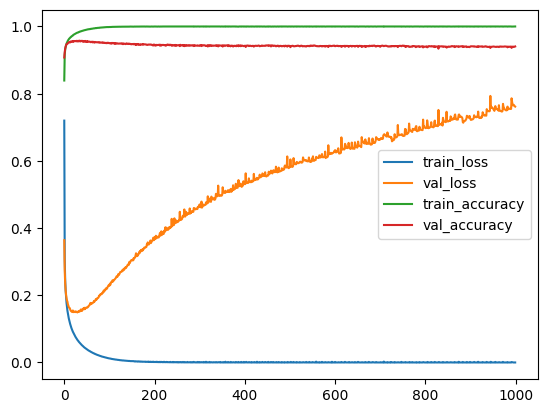

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


As it can be seen on the plot the model started overfitting before the 20th epoch, meaning thst there was no improvement after around the 20th epoch. In order to avoid the model to be overfitted it will be implemented a method called Callback later on.

After validating the model we test it with the test dataset:

In [ ]:
test_loss, test_accuracy = myModel.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy*100:.2f}%")


313/313 - 1s - loss: 0.7469 - accuracy: 0.9423 - 546ms/epoch - 2ms/step
Test accuracy: 94.23%


The accuracy of the test is of 94.23%. It will be implemented some tests to see if that value can be improved.

313/313 [==============================] - 0s 1ms/step


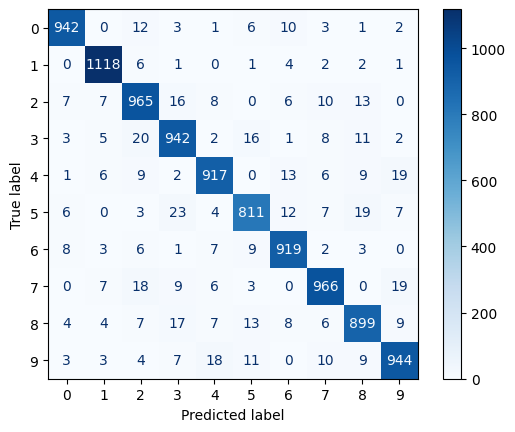

In [ ]:
y_pred = np.argmax(myModel.predict(x_test), axis=-1)
cm = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()


## **Trying with callbacks**


The **early_stopping** callback is used in machine learning to prevent overfitting and to stop training a model once it no longer improves on a certain metric, in this case, the validation loss.

**monitor='val_loss'**: This parameter specifies the metric that the callback monitors to decide when to stop training. In this case it is monitoring the validation loss. The callback will check if the validation loss is improving or not.

**patience=10**: The patience parameter determines how many epochs the training is allowed to continue without an improvement in the monitored metric (in this case, validation loss). If the validation loss does not improve for 10 consecutive epochs, training will be stopped.

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


In [ ]:
historyy = myModel.fit(x_train, y_train, batch_size=32, epochs=1000, validation_data=(x_val, y_val), callbacks=[early_stopping])


Epoch 1/1000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6835 - accuracy: 0.8563 - val_loss: 0.3468 - val_accuracy: 0.9096
Epoch 2/1000
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2995 - accuracy: 0.9175 - val_loss: 0.2688 - val_accuracy: 0.9256
Epoch 3/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2391 - accuracy: 0.9329 - val_loss: 0.2282 - val_accuracy: 0.9358
Epoch 4/1000
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2059 - accuracy: 0.9418 - val_loss: 0.2033 - val_accuracy: 0.9425
Epoch 5/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1831 - accuracy: 0.9479 - val_loss: 0.1937 - val_accuracy: 0.9439
Epoch 6/1000
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1654 - accuracy: 0.9537 - val_loss: 0.1794 - val_accuracy: 0.9482
Epoch 7/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1522 - accuracy: 0.9570 - val_loss: 0.1721 -

The callback helped to avoid the model to overfit, making it stop in the 33rd epoch when the model was not experiencing any more improvements. The only problem now is that the model saved was the last, with 95.89% of accuracy, even though the best model

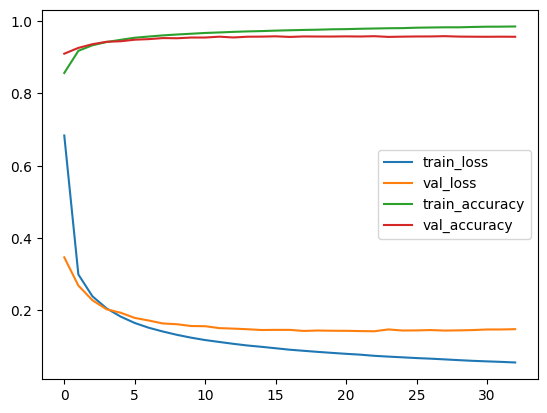

In [ ]:
plt.plot(historyy.history['loss'], label='train_loss')
plt.plot(historyy.history['val_loss'], label='val_loss')
plt.plot(historyy.history['accuracy'], label='train_accuracy')
plt.plot(historyy.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


In [ ]:
test_loss, test_accuracy = myModel.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy*100:.2f}%")


313/313 - 1s - loss: 0.1467 - accuracy: 0.9589 - 537ms/epoch - 2ms/step
Test accuracy: 95.89%


313/313 [==============================] - 1s 2ms/step


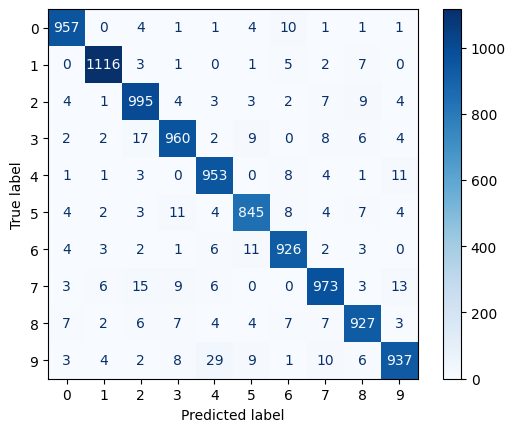

In [ ]:
y_pred = np.argmax(myModel.predict(x_test), axis=-1)
cm = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()


## **The best Result so far**

In the cell below it is:
- Created the model
- Compiled the model
- Displayed the results in plots

Epoch 1/100
1500/1500 [==============================] - 9s 5ms/step - loss: 0.4652 - accuracy: 0.9180 - val_loss: 0.2991 - val_accuracy: 0.9575
Epoch 2/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2796 - accuracy: 0.9562 - val_loss: 0.2332 - val_accuracy: 0.9671
Epoch 3/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2319 - accuracy: 0.9624 - val_loss: 0.2256 - val_accuracy: 0.9622
Epoch 4/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2101 - accuracy: 0.9657 - val_loss: 0.2032 - val_accuracy: 0.9688
Epoch 5/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1921 - accuracy: 0.9688 - val_loss: 0.1919 - val_accuracy: 0.9693
Epoch 6/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1743 - accuracy: 0.9718 - val_loss: 0.1729 - val_accuracy: 0.9725
Epoch 7/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1650 - accuracy: 0.9736 - val_loss: 0.1720 - val_ac

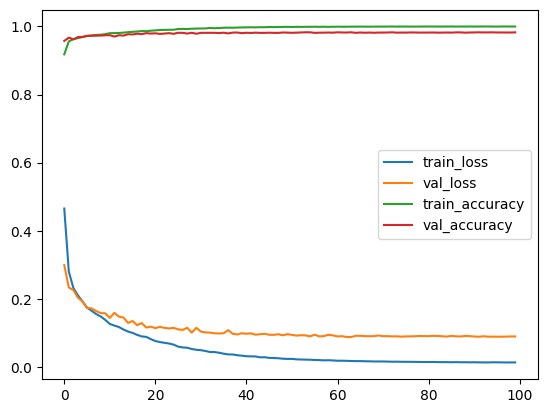

313/313 - 1s - loss: 0.0808 - accuracy: 0.9830 - 703ms/epoch - 2ms/step
Test accuracy: 98.30%
313/313 [==============================] - 1s 2ms/step


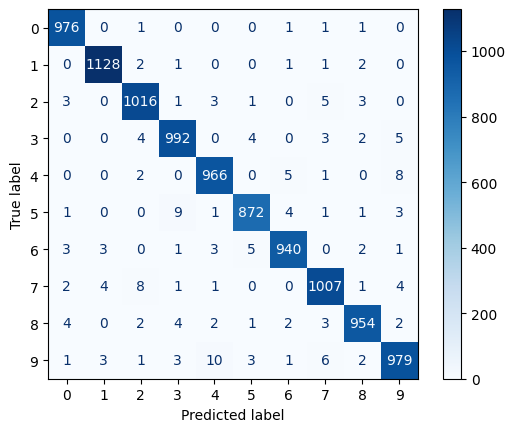

In [ ]:
myModel = tf.keras.Sequential([
    layers.Flatten(input_shape=(img_height, img_width)),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

# Compile the model with a learning rate schedule
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.96, staircase=True
)
my_optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

myModel.compile(optimizer=my_optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Train the model
history = myModel.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

# Plot loss and accuracy
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# Evaluate on test set
test_loss, test_accuracy = myModel.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

# Confusion Matrix
y_pred = np.argmax(myModel.predict(x_test), axis=-1)
cm = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()



# Save the best model and test the results

In the cell below it is:
- Created the model
- Compiled the model
- Define a Callback to stop the training when there is no improvement
- Saved the best model
- Displayed the results in plots

Epoch 1/100
1491/1500 [============================>.] - ETA: 0s - loss: 0.4619 - accuracy: 0.9183
Epoch 1: val_loss improved from inf to 0.32132, saving model to best_model.h5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.4614 - accuracy: 0.9184 - val_loss: 0.3213 - val_accuracy: 0.9472
Epoch 2/100
  15/1500 [..............................] - ETA: 11s - loss: 0.3207 - accuracy: 0.9521

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1496/1500 [============================>.] - ETA: 0s - loss: 0.2830 - accuracy: 0.9543
Epoch 2: val_loss improved from 0.32132 to 0.23452, saving model to best_model.h5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2830 - accuracy: 0.9543 - val_loss: 0.2345 - val_accuracy: 0.9663
Epoch 3/100
1499/1500 [============================>.] - ETA: 0s - loss: 0.2318 - accuracy: 0.9630
Epoch 3: val_loss did not improve from 0.23452
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2318 - accuracy: 0.9630 - val_loss: 0.2812 - val_accuracy: 0.9473
Epoch 4/100
1489/1500 [============================>.] - ETA: 0s - loss: 0.2060 - accuracy: 0.9662
Epoch 4: val_loss improved from 0.23452 to 0.21255, saving model to best_model.h5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2060 - accuracy: 0.9662 - val_loss: 0.2125 - val_accuracy: 0.9638
Epoch 5/100
1496/1500 [============================>.] - ETA: 0s - loss: 0.1969 - accuracy: 0.9672
Epoch 

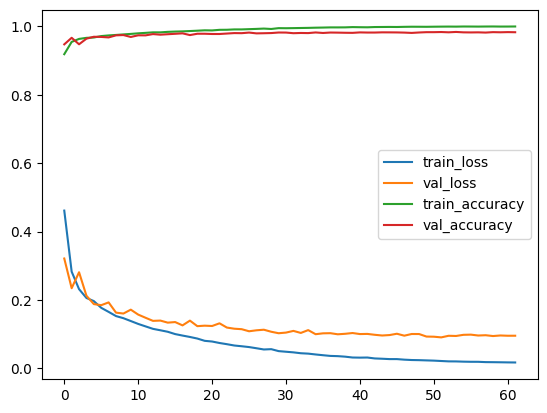

313/313 [==============================] - 1s 3ms/step - loss: 0.0873 - accuracy: 0.9833
Test accuracy: 98.33%
313/313 [==============================] - 1s 2ms/step


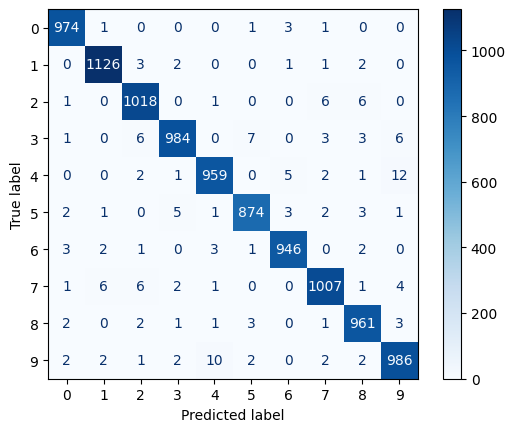

In [6]:
myModel = tf.keras.Sequential([
    layers.Flatten(input_shape=(img_height, img_width)),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

# Compile the model with a learning rate schedule
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.96, staircase=True
)
my_optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

myModel.compile(optimizer=my_optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Define the callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

from tensorflow.keras.callbacks import ModelCheckpoint

# Define a callback to save the best model during training
checkpoint = ModelCheckpoint("best_model.h5",  # File where the best model will be saved
                             monitor='val_loss',  # Metric to monitor (e.g., validation loss)
                             save_best_only=True,  # Save only the best model
                             mode='min',  # In this case, we want to minimize the validation loss
                             verbose=1)  # Display a message when a new best model is saved

# Train your model with the ModelCheckpoint callback
history = myModel.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping, checkpoint])

# Plot loss and accuracy
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


from tensorflow.keras.models import load_model

# Load the best model for testing
best_model = load_model("best_model.h5")

# Evaluate the best model on your test dataset
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)

# Evaluate on test set
#test_loss, test_accuracy = myModel.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

# Confusion Matrix
y_pred = np.argmax(myModel.predict(x_test), axis=-1)
cm = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()



# Conclusion


The test was concluded with an accuracy of 98.33%, above the 94.23% gotten in the initial model. The model did not fail in extreme to predict the right digits, but had a relatively higher difficulty predicting the digit 10, mistaken it with 4 for 10 times, and doing the vice versa, 12 times. The rest of the digits had failed 6 times the most, what makes it a relatively good model.